
This is programming assignment for week 1. In this assignment you will be working with scikit-learn to perform exploratory data analysis and practice working with text data.

Please, read all the notebook carefully and make sure that you understand not only the task, but the whole pipeline.


# Table of Contents:
* [Problem 1.](#part1)  Exploratory data analysis
     - [Task 1](#task1) [1 pt]
     - [Task 2](#task2) [2 pts]
     - [Task 3](#task3) [2 pts]
     - [Task 4](#task4) [1 pt]
     - [Task 5](#task5) [1 pts]
     - [Task 6](#task6) [2 pts]
     - [Task 7](#task7) [1 pts]
   
* [Problem 2](#problem2). Text data analysis
    - [Task 1](#task2_1) [0 pts]
    - [Task 2](#task2_2) [0 pts]
    - [Task 3](#task2_3) [4 pts]
    - [Task 4](#task2_4) [1 pts]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import os

In [129]:
import warnings
warnings.filterwarnings("ignore")

In this task we will go through standard exploratory data analysis and preprocessing steps as well as use them to prepare a dataset and train a predictive model.

Let's take a look at the data. We will analyze a dataset of diamond characterics, such as size, color and clarity, in order to train a model to predict it's price.

<!-- The data used in this task is slighly preprocessed open dataset from kaggle.com https://www.kaggle.com/shivam2503/diamonds  -->


 * price - price in US dollars (326--18,823)

 * carat - weight of the diamond (0.2--5.01)

 * cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

 * color - diamond colour, from J (worst) to D (best)

 * clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

 * x - length in mm (0--10.74)

 * y - width in mm (0--31.8)

 * z - depth in mm (0--31.8)

 * depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

 * table - width of top of diamond relative to widest point (43--95)

---
## Problem 1. Exploratory data analysis <a class="anchor" id="part1"></a>
---

In [130]:
file_path = "https://github.com/mbburova/MDS/raw/main/diamonds_prep.csv"
df = pd.read_csv(file_path, index_col=0)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,NaN,NaN,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,NaN,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    51240 non-null  float64
 1   cut      51205 non-null  object 
 2   color    48563 non-null  object 
 3   clarity  51297 non-null  object 
 4   depth    51184 non-null  float64
 5   table    48596 non-null  float64
 6   price    53940 non-null  int64  
 7   x        51333 non-null  float64
 8   y        51275 non-null  float64
 9   z        51243 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB



---
**Task 1.1** [1 pt]  <a class="anchor" id="task1"></a>

* 1) Carefully read the description of the columns in our dataset, find some inconsistencies in the description of the columns and the values in this table (df.describe). Fix this problem (delete the lines). **Hint -> look at the last columns.**
* 2) Are there duplicate rows in our dataset? If so, delete them. Print the number of resulting rows after cleaning
* 3) It's time to work with outliers in our data, they can have quite a big impact on how we will restore data and train models (The impact will certainly be negative if we don't work on it)
* 4) Check out the density graphs and numeric column boxplots below. Using the interquartile range **(IQR)**(), get rid of outliers in our data (in those columns that are presented in the graphs). Specify the number of resulting rows after this work

In [132]:
# Are there duplicate rows in our dataset? If so, delete them. Print the number of resulting rows after cleaning
# Using the interquartile range, get rid of outliers in our data. Specify the number of resulting rows after this work

df.shape[0]

53940

In [133]:
def density(column):
    plt.figure(figsize = [10, 5])
    sns.histplot(data = df, x = column, kde = True, bins = 40)
    plt.title(f'density of - {column}', fontsize = 13)
    plt.xlabel('values')
    plt.ylabel('density')
    plt.grid()
    plt.tight_layout()
    plt.show()

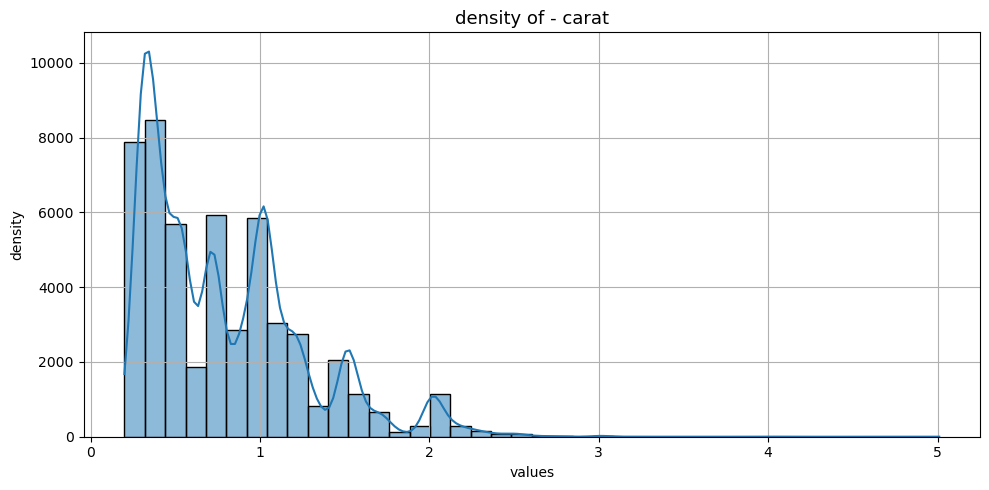

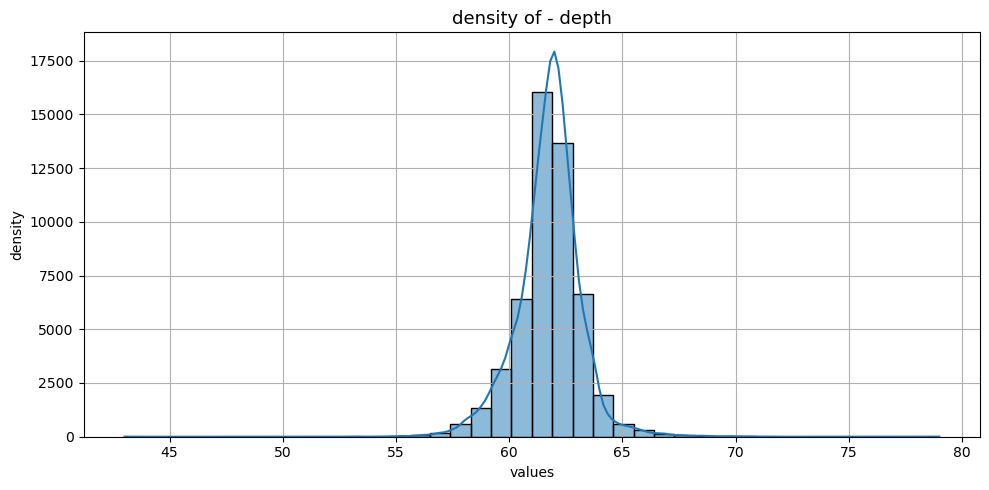

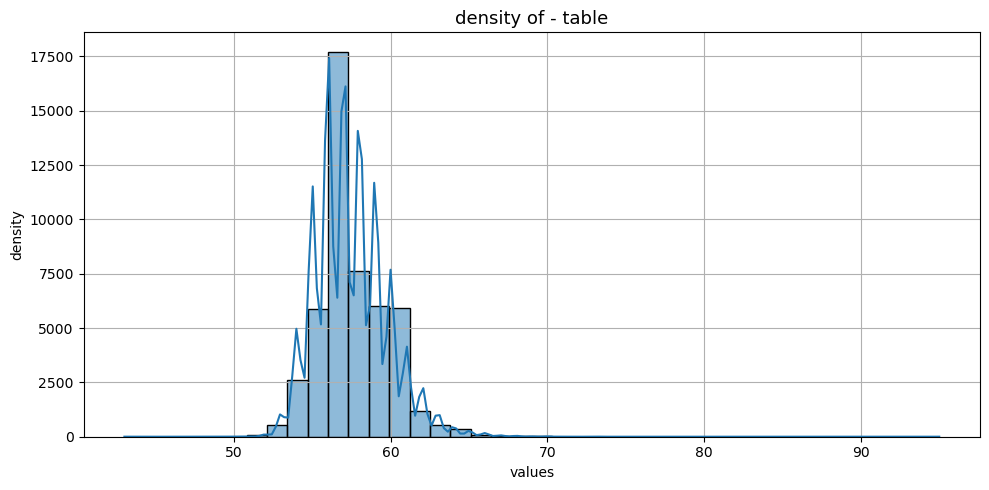

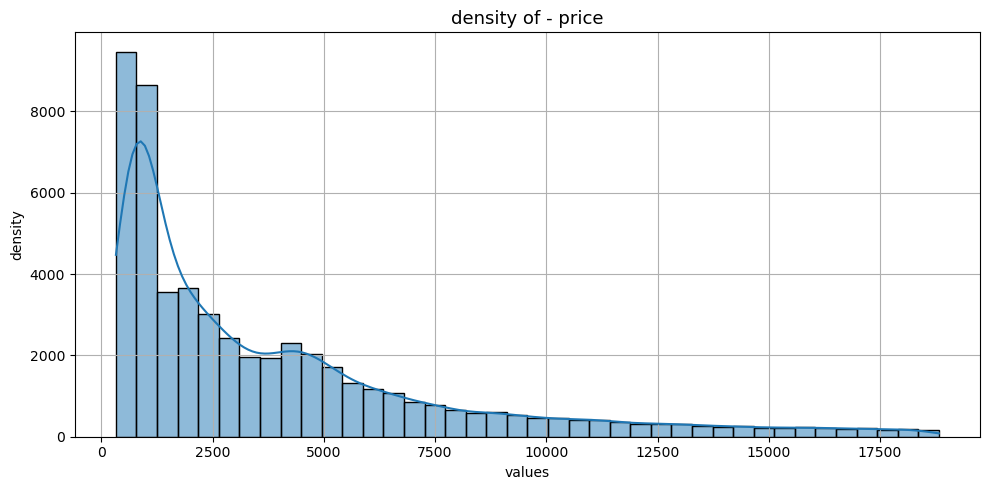

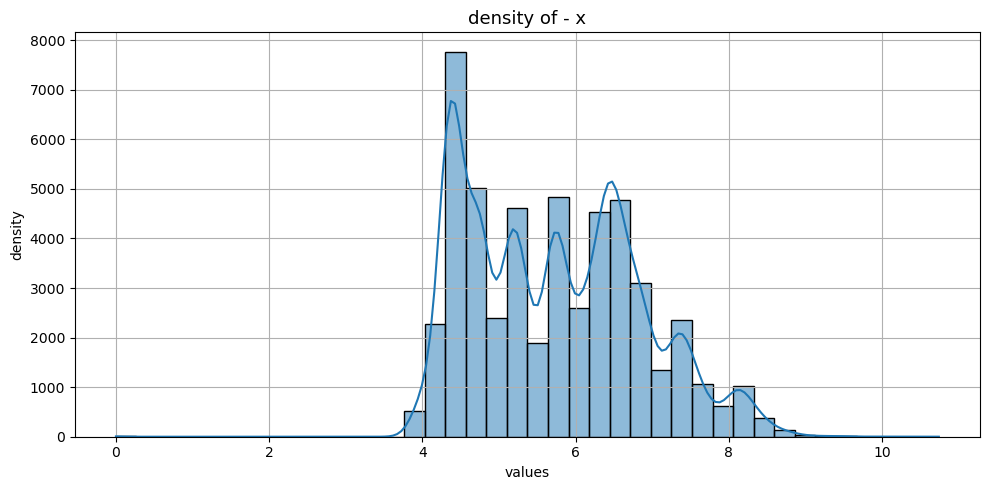

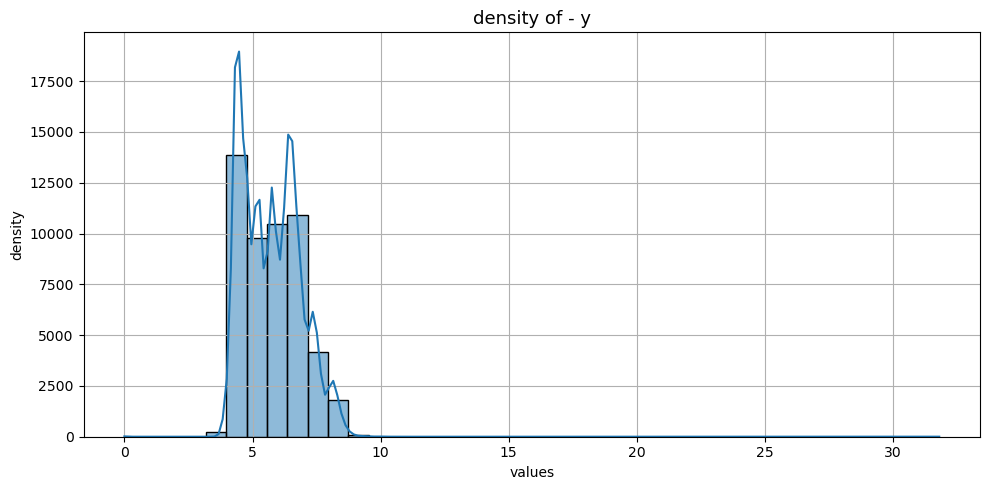

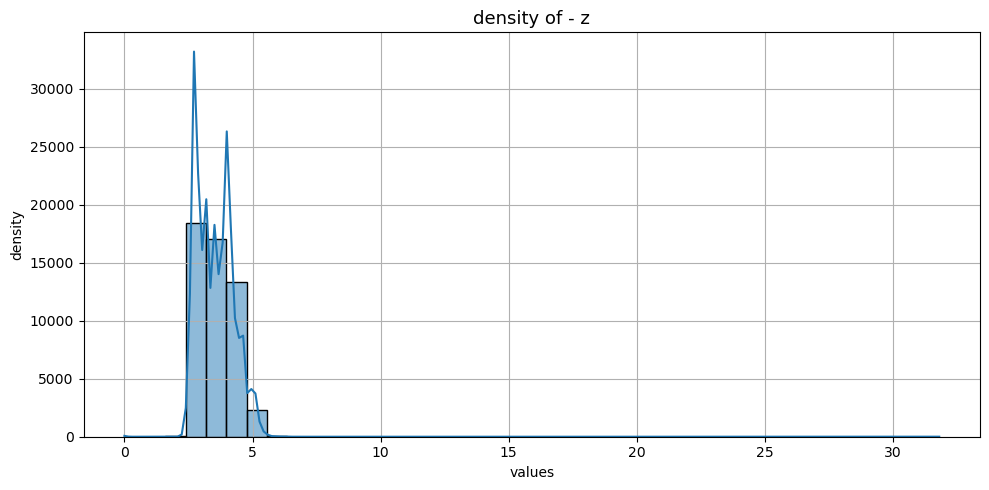

In [134]:
# pay attention to the variable called num_cols
num_cols = df.columns[(df.dtypes == "int64")|(df.dtypes == "float64")].tolist()
for i in num_cols:
    density(i)

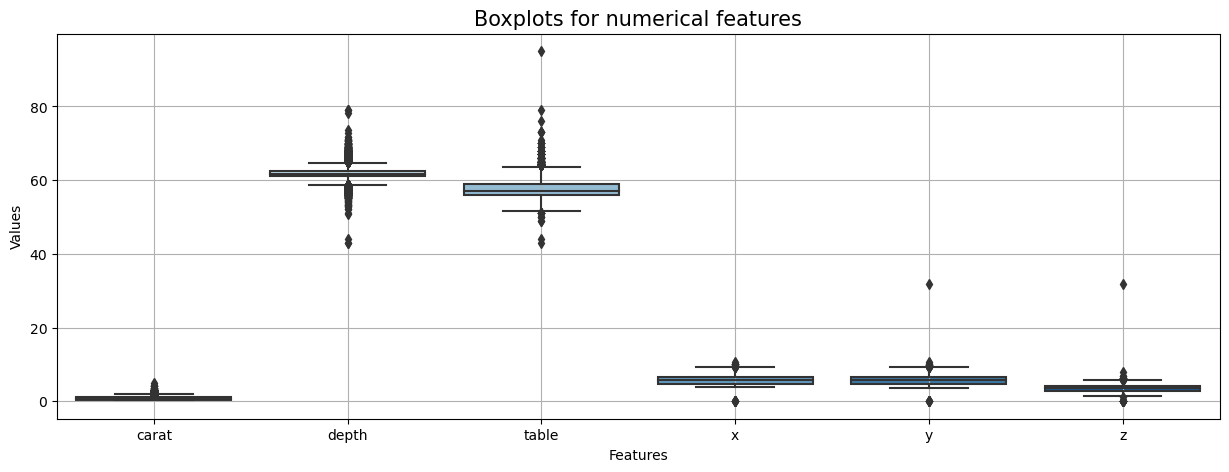

In [135]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = df[['carat', 'depth', 'table', 'x', 'y', 'z']], palette="Blues")
plt.title('Boxplots for numerical features', fontsize = 15)
plt.grid()
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [136]:
# Your code goes here(3, 4 part of the task 1.1)

# Your code goes here(1, 2 part of the task 1.1)
df = pd.read_csv(file_path, index_col=0)
df = df.drop_duplicates()

for col in ['x', 'y', 'z']:
    df = df[df[col] != 0]

df.shape[0]

53869

In [137]:
stat = df.describe().T
stat['iqr'] = stat['75%'] - stat['25%']
stat['lb'] = stat['25%'] - 1.5 * stat['iqr']
stat['ub'] = stat['75%'] + 1.5 * stat['iqr']
stat = stat[['lb', 'ub']].T

In [138]:
df.drop(df[df['carat'] > stat.iloc[1]['carat']].index, inplace = True)
df.drop(df[(df['depth'] < stat.iloc[0]['depth']) | (df['depth'] > stat.iloc[1]['depth'])].index, inplace = True)
df.drop(df[(df['x'] < stat.iloc[0]['x']) | (df['x'] > stat.iloc[1]['x'])].index, inplace = True)
df.drop(df[(df['y'] < stat.iloc[0]['y']) | (df['y'] > stat.iloc[1]['y'])].index, inplace = True)
df.drop(df[(df['z'] < stat.iloc[0]['z']) | (df['z'] > stat.iloc[1]['z'])].index, inplace = True)
df.drop(df[(df['table'] < stat.iloc[0]['table']) | (df['table'] > stat.iloc[1]['table'])].index, inplace = True)

In [139]:
df.shape[0]

49514

Now, we need to exclude the target variable, price, and split the dataset into train and test sets. We will use the former to perform all the data analysis steps and train the model, and the latter - to assess the model prediction quality on new data.

In [140]:
X = df.drop('price', axis = 1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [141]:
X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]

(34659, 14855, 34659, 14855)

In [142]:
np.round(X_train.mean(), 2)

carat     0.74
depth    61.78
table    57.26
x         5.61
y         5.62
z         3.47
dtype: float64

### Missing values

<!-- [Missing values recap] - missing values may occir / appear in the data for various reasons. -->

Most of the classical models are unable to handle missing values. Thus, we need to remove them from the data or fill with some value.

There exist various strategies to deal with missing values. If some column or row lacks a significant part of the data, it may be reasonable to completely drop it. However, in most cases, this leads to significant information loss. Instead, missing values can be filled with some constant (such as 0 or an empty string), or a statistic of the corresponding feature (such as mean, median, or mode). When filling missing values, one may also create an additional feature that indicates whether the value was present in the original data. This can be informative because sometimes the absence of a feature value can be a feature in itself.


<!-- Однако в большинстве случаев это приводит к значительной потере информации. Вместо этого, пропущенные значения могут быть заполнены некоторой константой, например нулем или пустой строкой, или статистикой по соответствующему признаку (например, средним, медианой или модой). При заполнении пропущенных значений, может быть также полезно создавать дополнительный признак-индикатор, указывающий, имелось ли это значение в изначальных данных. Так как иногда отсутствие значения само по себе может являться признаком. -->

<!-- - (the most simple) just remove the feature that contains missing values and / or objects that have many empty fiels,
- fill missing values with some constant value, for example, 0, -1 or an empty string
- fill missing values with some statistic of the feature (mean, median, mode, etc)
- ... -->

In [143]:
df.isna().sum()

carat      2543
cut        2499
color      4906
clarity    2427
depth      2653
table      4993
price         0
x          2413
y          2454
z          2511
dtype: int64

Number of categorical features = 3 

Distribution of categorical features:


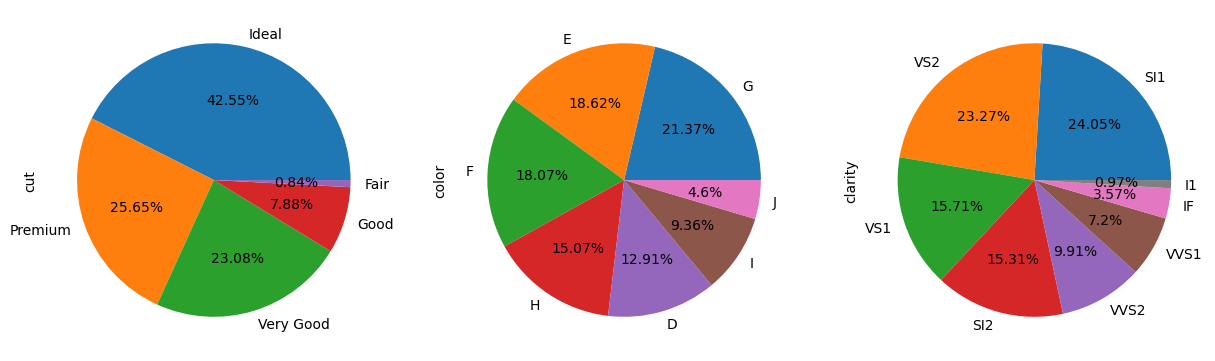

In [144]:
cat_cols = df.columns[df.dtypes == "object"].tolist() #
print("Number of categorical features =", len(cat_cols), "\n")

print("Distribution of categorical features:")
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i + 1)
    df[col].value_counts(normalize=True).plot.pie(autopct=lambda x: f"{round(x, 2)}%")
plt.show()

This dataset contains both numerical and categorical characteristics. The latter ones take string values, each of which means a certain category. Most standard machine learning algorithms are able to work only with numerical variables, and categorical data have to be additionally prepared before model training.

<!-- Also, most of the models usually cannot handle missing values in the data, so we need to check if there are any in our dataset. -->

<!-- However, first we will need to check if there are any **missing values** in the data and properly handle them.  -->

In [145]:
print("Number of missing values in each column:\n")
X_train[cat_cols].isnull().sum(), X_test[cat_cols].isnull().sum()

Number of missing values in each column:



(cut        1751
 color      3398
 clarity    1732
 dtype: int64,
 cut         748
 color      1508
 clarity     695
 dtype: int64)

In [146]:
miss_perc, miss_count = (df.isnull().mean()*100).to_list(), (df.isnull().sum()).to_list()
s1 = pd.Series(miss_count, index=list(df.columns.values), name='miss_count')
s2 = pd.Series(miss_perc, index=list(df.columns.values), name='miss_perc')
pd.concat([s1, s2], axis=1)

,miss_count,miss_perc
carat,2543,5.135921
cut,2499,5.047057
color,4906,9.908309
clarity,2427,4.901644
depth,2653,5.358081
table,4993,10.084017
price,0,0.000000
x,2413,4.873369
y,2454,4.956174
z,2511,5.071293


* For categorical features, let's basically fill missing values with mode. It is important to fill train and test separately so as not to mix anything up

In [147]:
for i in cat_cols:
    X_train[i].fillna(X_train[i].mode()[0], inplace=True)
    X_test[i].fillna(X_test[i].mode()[0], inplace=True)

* https://academy.yandex.ru/handbook/data-analysis/article/obrabotka-propushennyh-znachenij
* Processing of missing values is a rather complicated process, in our tasks we will use basic techniques. This is additional material that is not mandatory to read. In general, Yandex handbook is a very useful thing if you want to dive in machine learning


---
**Task 1.2** [2 pts]  <a class="anchor" id="task2"></a>

For numerical features, impelement a class that fills missing values in each feature with its mean value.

- Implement a `fit` method that takes as input feature matrix `X` and computes and saves **mean** value of each feature (assuming that all the features are numerical). The feature matrix can be either `pd.DataFrame`, or `np.ndarray`.
- Implement a `transform` method that takes as input feature matrix `X` and replaces NaN values in each feature with a corresponding mean value and returns a transformed feature matrix.

<!-- Note, that `fit` method also takes target variable `y` as argument. It is needed for compatibility with other ML staff, however, in this class target variable will not be used, and you can just leave it equal to `None`. -->


In [148]:
from sklearn.base import TransformerMixin, BaseEstimator

class MeanImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """
        Compute and save mean value of each feature in the feature matrix.

        Parameters
        ----------
        X : pd.DataFrame or numpy.ndarray of shape (n_samples, n_features)
            Feature matrix.
        y : pd.Series or numpy.ndarray of shape (n_samples,) (default : None)
            Target values. Optional.

        Returns
        -------
        self : returns an instance of self.
        """
        self.column_mean = []
        for i in range(X.shape[1]):
            if type(X) is not np.ndarray:
                X_i = X.values[:, i]
            else:
                X_i = X[:, i]
            
            self.column_mean.append(np.nanmean(X_i))

        return self

    def transform(self, X):
        """
        Fills missing values in each feature with a corresponding mean value.

        Parameters
        ----------
        X : pd.DataFrame or numpy.ndarray of shape (n_samples, n_features)
            Feature matrix.

        Returns
        -------
        X_transformed : array-like of shape (n_samples, n_features)
            Transformed feature matrix.
        """

        X_transformed = []
        for i in range(len(self.column_mean)):
            if type(X) is not np.ndarray:
                X_i = X.values[:, i]
            else:
                X_i = X[:, i]

            # Fills missing values in each feature with a corresponding mean value.
            X_i[np.isnan(X_i)] = self.column_mean[i]
            X_transformed.append(X_i)


        X_transformed = np.column_stack(X_transformed)
        return X_transformed

In [149]:
# you can use this code as a test to check if you have implemented the methods correctly.
A = np.array([
    [0, np.nan, 3],
    [np.nan, 6, 7],
    [np.nan, 8, np.nan],
])
mean_imp = MeanImputer()
mean_imp.fit(A)
print(mean_imp.column_mean)

assert mean_imp.column_mean == [0.0, 7.0, 5.0], "Computed mean values are incorrect."
mean_imp.fit(pd.DataFrame(A))
A_transformed = mean_imp.transform(pd.DataFrame(A))
assert ~np.isnan(A_transformed).any(), "Transformed feature matrix still contains NaNs."
assert np.allclose(A_transformed,
                   [[0., 7., 3.],
                    [0., 6., 7.],
                    [0., 8., 5.]]), "Filled values are incorrect."

[0.0, 7.0, 5.0]


### Numerical features

From the histograms of numerical variables, you can also see that different features have different value ranges. However, many machine learning models, in particular linear models and kNN algorithm, are sensitive to feature scales. Therefore, it is a good practice to scale all the numeric variables to the same range before training.




---
**Task 1.3** [2 pts]  <a class="anchor" id="task3"></a>

For numerical features, impelement a class that normalizes each feature values by subtracting the mean and dividing by the standard deviation.

- Implement a `fit` method that takes as input feature matrix `X` and computes and saves **mean** and **std** values of each feature (assuming that all the features are numerical). The feature matrix can be either `pd.DataFrame`, or `np.ndarray`.
- Implement a `transform` method that takes as input feature matrix `X` and normalizes each column using precomputed mean and std values for this feature.

In [150]:
from sklearn.base import TransformerMixin, BaseEstimator

class Scaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """
        Compute and save mean and standard deviation values
        of each feature in the feature matrix.

        Parameters
        ----------
        X : pd.DataFrame or numpy.ndarray of shape (n_samples, n_features)
            Feature matrix.
        y : pd.Series or numpy.ndarray of shape (n_samples,) (default : None)
            Target values. Optional.

        Returns
        -------
        self : returns an instance of self.
        """
        self.column_mean = []
        self.column_std = []
        for i in range(X.shape[1]):
            # extract column values
            if type(X) is not np.ndarray:
                X_i = X.values[:, i]
            else:
                X_i = X[:, i]

            self.column_mean.append(np.mean(X_i))
            self.column_std.append(np.std(X_i))
    
        return self

    def transform(self, X):
        """
        Normalizes values of each feature
        by subtructing the corresponding precomputed feature mean
        and dividing by the corresponding standard deviation.

        Parameters
        ----------
        X : pd.DataFrame or numpy.ndarray of shape (n_samples, n_features)
            Feature matrix.

        Returns
        -------
        X_transformed : array-like of shape (n_samples, n_features)
            Transformed feature matrix.
        """
        X_transformed = []

        for i in range(len(self.column_mean)):
            # extract column values
            if type(X) is not np.ndarray:
                X_i = X.values[:, i]
            else:
                X_i = X[:, i]

            X_i = (X_i - self.column_mean[i]) / self.column_std[i]
            X_transformed.append(X_i)
            
        X_transformed = np.column_stack(X_transformed)
        return X_transformed

In [151]:
# you can use this code as a test to check if you have implemented the methods correctly.
A = np.arange(9).reshape(3, 3)
scaler = Scaler()
scaler.fit(A)

assert np.allclose(scaler.column_mean, [3.0, 4.0, 5.0]), "Computed mean values are incorrect."
assert np.allclose(scaler.column_std, [2.44949, 2.44949, 2.44949]), "Computed std values are incorrect."
scaler.fit(pd.DataFrame(A))
A_transformed = scaler.transform(pd.DataFrame(A))
assert np.allclose(A_transformed,
                   [[-1.22474, -1.22474, -1.22474],
                    [ 0.     ,  0.     ,  0.     ],
                    [ 1.22474,  1.22474,  1.22474]]), "Scaled values are incorrect."

 ### Model training and validation

Now, we will train and evaluate the first regression model for diamond price prediction using only the numerical features. We will use **k-nearest neighbors** algorithm to build the model, and mean absolute error metric to evaluate its predictive performance.

It is important that for correct and fair training, the test set should not be used at any stage of model building. Therefore, statistics for feature preprocessing have to be estimated only on the training sample. For example, the mean and standard deviation of each column should be computed on the training set and then used to normalize the features in both the training and test sets.

`Sklearn` contains ready-to-use feature transformer classes, with the `fit` method to estimate parameters on the training set and the `transform` method to actually apply the transformation to training and test sets. `MeanImputer` and `Scaler` classes, that you have implemented previously, are also compatible with other sklearn transformers.

There also exist several tools to combine transformers and estimators into a single pipeline:
- `ColumnTransformer`
- `Pipeline`
- `make_pipeline`

In [152]:
# removing price to run the pipeline
num_cols.remove('price')

In [153]:
# define transformations for numerical columns using MeanImputer and Scaler
num_transformers_pipe = make_pipeline(
    MeanImputer(),
    Scaler(),
)

# define column transformer (we drop non-numerical features)
col_transformer = ColumnTransformer([
    ("num_col_transformer", num_transformers_pipe, num_cols),
], remainder='drop')


# define a Pipeline with 2 steps: 1. transform columns; 2. Apply the model
model = Pipeline([
    ("col_transformer", col_transformer),
    ("estimator", KNeighborsRegressor())
]
)


---
**Task 1.4** [1 pt]  <a class="anchor" id="task4"></a>

* **starting from task 1.4, the answer will be the result of the model on the train and on the test (MAE)**

Implement a function to evaluate performance of a given model both on the train and test sets.
The function should
- take as input a model (possibly a pipeline), as well as feature matrix and target variable for both train and test sets,
- fit the model on the train set,
- compute model predictions for train and test sets,
- assess the quality of both predictions with mean absolute error (MAE) metric,
- return train and test MAE scores.

In [154]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Trains the model on the training set and evaluates its performance
    on the test set using the following metrics:
    - mean absolute error (MAE)
    - mean squared error (MSE)
    """

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae = np.abs(y_train - y_train_pred).mean()
    test_mae = np.abs(y_test - y_test_pred).mean()

    return train_mae, test_mae

Evaluate performance of the model based on numerical features only:

In [155]:
# evaluate_model function
mae_tr, mae_te = evaluate_model(model, X_train, y_train, X_test, y_test)

In [156]:
models_scores = {}
models_scores["num only"] = {"train" : mae_tr, "test" : mae_te}
print("Train MAE = %.2f" % mae_tr)
print("Test MAE = %.2f" % mae_te)

Train MAE = 635.35
Test MAE = 788.84


### Categorical features

<!-- [categorical features recap?] -->

Most of the machine learning models cannot work with categorical features directly in their original form. However, there are several ways to represent them in an alternative form (encode). We will consider and compare two options for encoding categorical features - **one-hot encoding** and **ordinal encoding**.

Ohe-hot-encoding is one of the most popular and straight-forward ways. In this case each categorical feature is replaced by a set of binary features for each category.

`Sklearn` has ready-to-use implementation of OneHotEncoder transformer (as well as many other transformers).



In [157]:
print("Categorical variable before one-hot encoding:")
display(X_train[["cut"]].head())

print("Categorical variable after one-hot encoding:")
ohenc = OneHotEncoder(sparse=False)
ohenc.fit_transform(X_train[["cut"]])
display(pd.DataFrame(ohenc.fit_transform(X_train[["cut"]]),
                     index=X_train.index, columns=ohenc.categories_).head())

Categorical variable before one-hot encoding:


,cut
52499,Premium
9168,Very Good
23982,Ideal
36400,Ideal
53531,Ideal


Categorical variable after one-hot encoding:


,Fair,Good,Ideal,Premium,Very Good
52499,0.0,0.0,0.0,1.0,0.0
9168,0.0,0.0,0.0,0.0,1.0
23982,0.0,0.0,1.0,0.0,0.0
36400,0.0,0.0,1.0,0.0,0.0
53531,0.0,0.0,1.0,0.0,0.0


**Task 1.5** [1 pts]  <a class="anchor" id="task5"></a>

Let us create a 2-step pipeline:

1. Column Transformer, which
    - Apply one-hot encoding to categorical feature
    - Apply `num_transformers_pipe` (defined above) to numerical feature
2. A regression model

Please, finish the definition of the `col_transformer`.

In [201]:
col_transformer = ColumnTransformer([
    ("num_col_transformer", num_transformers_pipe, num_cols),
    ("cat_col_transformer", OneHotEncoder(), cat_cols)
], remainder='drop')


model = Pipeline(steps = [
    ("col_transformer", col_transformer),
    ("estimator", KNeighborsRegressor())
])

In [202]:
#you can use this test as a check that you have done everything correctly
assert len(col_transformer.transformers) == 2, '`col_transformer` should have 2 groups - for numerical and categoical features'
num_pipe1 = isinstance(col_transformer.transformers[0][1], Pipeline)
num_pipe2 = isinstance(col_transformer.transformers[1][1], Pipeline)
assert  num_pipe1 | num_pipe2, 'Numerical features should be transformed via  `num_transformers_pipe`'

cat_pipe1 = isinstance(col_transformer.transformers[0][1], OneHotEncoder)
cat_pipe2 = isinstance(col_transformer.transformers[1][1], OneHotEncoder)
assert  cat_pipe1 | cat_pipe2, 'Categorical features should be transformed via  `OneHotEncoder`'


In [160]:
mae_tr, mae_te = evaluate_model(model, X_train, y_train, X_test, y_test)
models_scores["num & cat (one-hot)"] = {"train" : mae_tr, "test" : mae_te}
print("Train MAE = %.2f" % mae_tr)
print("Test MAE = %.2f" % mae_te)

Train MAE = 371.33
Test MAE = 464.52


---
**Task 1.6** [2 pts]  <a class="anchor" id="task6"></a>

### Ordinal categorical variables

In some cases, categorical variables may have ordinal values. For example, in our data, the attribute "cut" has values Fair, Good, Very Good, Premium, and Ideal. We can assume that these values are "ordered" and encode them with the numbers 1, 2, 3, 4 and 5 respectively. Thus, 1 means "worst" value (Fair) and 5 means "best" (Ideal) and 0 can be used to encode "Unknown" (missing) values.
This can provide additional information to the model and improve quality, especially for linear models. Other two features can be considered in the same way.
* 'J', 'I', 'H', 'G', 'F', 'E', 'D' for color
* 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF' for clarity

In [197]:
# create lists of categories for each ordinal feature
# (categories should be ordered from min to max)
ord_col_categories = [["Fair","Good","Very Good","Premium","Ideal",],
                      ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF",],
                      ["J", "I", "H", "G", "F", "E", "D"]]

ord_cols = ["cut", "clarity", "color"]

In [198]:
# define ordinal encoders
ord_enc = make_pipeline(
    OrdinalEncoder(categories=ord_col_categories),
    # StandardScaler(),]
)

# combine all column transforms
col_transformer = ColumnTransformer(transformers = [
    ("num_col_transformer", num_transformers_pipe, num_cols),
    ("ord_col_transformer", ord_enc, ord_cols),
], remainder='drop')


model = Pipeline(steps = [
    ("col_transformer", col_transformer),
    ("estimator", KNeighborsRegressor())
])

In [199]:
# evaluate model performance
mae_tr, mae_te = evaluate_model(model, X_train, y_train, X_test, y_test)
models_scores["num, ord"] = {"train" : mae_tr, "test" : mae_te}
print("Train MAE = %.2f" % mae_tr)
print("Test MAE = %.2f" % mae_te)

Train MAE = 342.72
Test MAE = 416.45



### Feature engineering

We can also use the original features to derive new, more complex or informative features on their basis.

For example, in our data we have three features "x", "y" and "z" and can assume that they correspond to measurements of the diamond size along three axes. In this case, product of these three features, that is, the approximate volume, can also be a useful feature for predicting the value of a diamond.



In [164]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
52499,0.50,Premium,D,VVS1,61.5,58.0,5.12,5.06,3.13
9168,0.98,Very Good,G,SI2,62.2,57.0,6.33,6.37,3.95
23982,1.75,Ideal,I,VS2,61.0,56.0,7.75,7.82,4.75
36400,0.31,Ideal,E,VS1,61.8,56.0,4.37,4.34,2.69
53531,0.74,Ideal,G,SI2,62.2,NaN,5.78,5.82,3.61


---
**Task 1.7** [1 pts]  <a class="anchor" id="task7"></a>

Add `volume` feature as a product of `x`, `y`, `z` features (to both train and test datasets)

In [165]:
def add_volume_feature(X):
    X["volume"] = X["x"] * X["y"] * X["z"]
    return X

X_train = add_volume_feature(X_train)
X_test = add_volume_feature(X_test)

In [166]:
# update list of numerical features
num_cols = X_train.columns[np.logical_or(X_train.dtypes == "int64",
                                         X_train.dtypes == "float64")].tolist() #
num_cols

['carat', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [182]:
# define columns transforms (nothing changes for ordinal features, but the list of numerical features was updated)
col_transformer = ColumnTransformer(transformers = [
    ("num_col_transformer", num_transformers_pipe, num_cols),
    ("ord_col_transformer", ord_enc, ord_cols)
], remainder='drop')

model = Pipeline(steps = [
    ("col_transformer", col_transformer),
    ("estimator", KNeighborsRegressor())
])

In [183]:
# evaluate model performance
mae_tr, mae_te = evaluate_model(model, X_train, y_train, X_test, y_test)
models_scores["num, ord + engineering"] = {"train" : mae_tr, "test" : mae_te}
print("Train MAE = %.2f" % mae_tr)
print("Test MAE = %.2f" % mae_te)

Train MAE = 342.72
Test MAE = 416.45


Finally, we may look how model performance on train and test sets have changed depending on the used features.

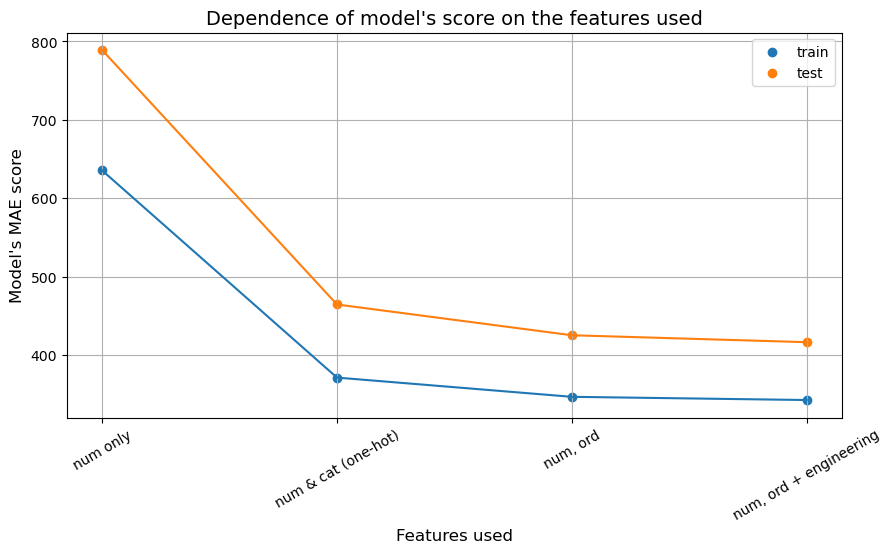

In [184]:
models = list(models_scores.keys())
train_scores = [models_scores[model]["train"] for model in models]
test_scores = [models_scores[model]["test"] for model in models]

plt.figure(figsize=(10, 5))
plt.plot(train_scores)
plt.plot(test_scores)
plt.scatter(range(len(models)), train_scores, label="train")
plt.scatter(range(len(models)), test_scores, label="test")
plt.xticks(range(len(models)), models, rotation=30)
plt.xlabel("Features used", fontdict={"size" : 12})
plt.ylabel("Model's MAE score", fontdict={"size" : 12})
plt.title("Dependence of model's score on the features used", fontdict={"size" : 14})
plt.legend()
plt.grid()
plt.show()

---
## Problem 2. Text data analysis <a class="anchor" id="problem2"></a>
---

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

---

In this part, we will solve the problem of prediction price of the wine based on text description of its characteristics. When working with text features, you have to first transform them into a vector form (vectorize) so that the model can process them. We wil consider two vectorization methods,
* **Bag-of-Words**
* **Tf-Idf**.

Let us read the data:

In [16]:
df = pd.read_csv("https://github.com/mbburova/MDS/raw/main/winemag-data_first50k.csv", index_col=0)
# drop rows with unknown price
df = df.loc[df["price"].notnull()]

y = df["price"]
X = df.drop(["price"], axis=1)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=1)

### Bag-of-Words vectorization

Bag-of-Words is one of the most obvious and straight-forward for the text descriptions vectorization.
In this case, we just create a feature column for each word appearing in the texts of the dataset. If the particular word is presented in the text description of a particular object, the value of the corresponding feature will be equal to 1, else - equal to 0. It is also possible to set the value of the feature to the number of times that the corresponding word has appeared in the object description.

In `sklearn`, you can obtain bag-of-words vector representation of the text using the `CountVectorizer` transformer. Note, that in this case value of the resulting features will be equal to the number of times the corresponding word appeared in the object description text.

---
**Task 2.1** [0 pts]  <a class="anchor" id="task2_1"></a>

Before vectorization, we need to prepare text descriptions. Write a function to clear the text from all non-alphabetic characters and convert it to lowercase.

**Hint**
- `.lower()` method is used to conver any string to the lower case. E.g `'Hello'.lower()` retuns `'hello'`
- Use `re.sub()` to replace all non-alphabetic characteer with empty string. You can read more about it in the [documentation](https://docs.python.org/3/library/re.html)


In [27]:
import re
def prepare_text(text):
    """
    Converts the text to lowercase and removes all the non-alphabetic characters
    (the cleared text should contain only letters from a to z and space symbols).
    """
    text = text.lower()
    cleared_text = re.sub(r'[^a-z\s]', '', text)

    return cleared_text

In [28]:
### TEST prepare_text
processed = prepare_text('CLEAR it!!!')
assert 'clear it' == processed

---
**Task 2.2** [0 pt]  <a class="anchor" id="task2_2"></a>

Apply `prepare_text` function to the `description` feature column in the datasets `X_tr` and `X_te`.

**Hint** Use the method `apply`from [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [29]:
X_tr["description"] = X_tr["description"].apply(prepare_text)
X_te["description"] = X_te["description"].apply(prepare_text)

In [30]:
print(X_tr["description"][0])

this tremendous  varietal wine hails from oakville and was aged over three years in oak juicy redcherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannins and a subtle minty tone in the background balanced and rewarding from start to finish it has years ahead of it to develop further nuance enjoy 


In [31]:
# make sure that this string does not contain upper case letter and non-alphabetical characters
print(X_tr["description"][0])

#you can use this test as a check that you have done everything correctly
assert X_tr["description"][100].lower() == X_tr["description"][100]
assert X_tr["description"][101].lower() == X_tr["description"][101]

assert X_te["description"][10].lower() == X_te["description"][10]
assert X_te["description"][11].lower() == X_te["description"][11]

this tremendous  varietal wine hails from oakville and was aged over three years in oak juicy redcherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannins and a subtle minty tone in the background balanced and rewarding from start to finish it has years ahead of it to develop further nuance enjoy 


---
**Task 2.3** [4 pt]  <a class="anchor" id="task2_3"></a>

Perform the **Bag-of-Words vectorization** of the texts in `description` column, train the linear regression model on the obtained numerical features and evaluate its mean absolute error on the test set.

- Use `CountVectorizer` from sklearn to perform Bag-of-Words vectorization.
    - Use the argument `min_df=0.001` to remove the words which appear in less then 0.1% of the documents
    - Read more about it the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- Fit the vectorizer using descriptions from the train dataset
- Create `textfeats_tr` which contains transformed descriptions from the train dataset
- Create `textfeats_te` which contains transformed descriptions from the test dataset

In [32]:
bow_vectorizer = CountVectorizer(min_df=0.001)
### BEGIN SOLUTION
bow_vectorizer.fit(X_tr["description"])

textfeats_tr = bow_vectorizer.transform(X_tr["description"])
textfeats_te = bow_vectorizer.transform(X_te["description"])

### END SOLUTION

In [11]:
print(textfeats_tr.shape)
print(textfeats_te.shape)

(31801, 2468)
(13630, 2468)


Train and evaluate a `LinearRegression` model on the obtained features. We will use function `evaluate_model`, that you've created in the previous part.

In [178]:
model = LinearRegression()
mae_tr, mae_te = evaluate_model(model, textfeats_tr, y_tr,
                                textfeats_te, y_te)
print("Train MAE = %.3f" % mae_tr)
print("Test MAE = %.3f" % mae_te)

Train MAE = 16.941
Test MAE = 18.684


### Tf-Idf vectorization

Another way to deal with text data is TF-IDF - Term Frequency - Inverse Document Frequency vectorization.

---
**Task 2.4** [1 pts]  <a class="anchor" id="task2_4"></a>

Perform **Tf-Idf vectorization** of the cleaned description obtained in the previous step.


- Use `TfidfVectorizer` from sklearn to perform Bag-of-Words vectorization.
    - Use the argument `min_df=0.001` to remove the words which appear in less then 0.1% of the documents
    - Read more about it the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- Fit the vectorizer using descriptions from the train dataset
- Create `textfeats_tr` which contains transformed descriptions from the train dataset
- Create `textfeats_te` which contains transformed descriptions from the test dataset

In [179]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.001)

tfidf_vectorizer.fit(X_tr["description"])

textfeats_tr = tfidf_vectorizer.transform(X_tr["description"])
textfeats_te = tfidf_vectorizer.transform(X_te["description"])

In [180]:
print(textfeats_tr.shape)
print(textfeats_te.shape)

(31801, 2468)
(13630, 2468)


Again, we need to train and evaluate the linear regression model on the vectorized text features.

In [181]:
model = LinearRegression()
mae_tr, mae_te = evaluate_model(model, textfeats_tr, y_tr,
                                textfeats_te, y_te)
print("Train MAE = %.3f" % mae_tr)
print("Test MAE = %.3f" % mae_te)

Train MAE = 16.893
Test MAE = 18.540
